In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 23)
Test: (4398, 22)


In [3]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# NaN

## Train

In [4]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
1,belongs_to_collection,2396,0.798667
4,homepage,2054,0.684667
17,tagline,597,0.199000
19,Keywords,276,0.092000
11,production_companies,156,0.052000
12,production_countries,55,0.018333
15,spoken_languages,20,0.006667
21,crew,16,0.005333
20,cast,13,0.004333
8,overview,8,0.002667


In [5]:
drop_cols = ['belongs_to_collection', 'homepage', # many NaNs
             'overview', 'tagline', 'title', 'original_title', # NLP
             'poster_path', 'imdb_id'] # unused

df_train.drop(drop_cols, axis = 1, inplace = True)
df_test.drop(drop_cols, axis = 1, inplace = True)

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 15)
Test: (4398, 14)


In [6]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
11,Keywords,276,0.092000
5,production_companies,156,0.052000
6,production_countries,55,0.018333
9,spoken_languages,20,0.006667
13,crew,16,0.005333
12,cast,13,0.004333
2,genres,7,0.002333
8,runtime,2,0.000667
0,id,0,0.000000
1,budget,0,0.000000


In [7]:
df_train['Keywords'].fillna('[]', inplace = True)
df_train['production_companies'].fillna('[]', inplace = True)
df_train['production_countries'].fillna('[]', inplace = True)
df_train['spoken_languages'].fillna('[]', inplace = True)
df_train['crew'].fillna('[]', inplace = True)
df_train['cast'].fillna('[]', inplace = True)
df_train['genres'].fillna('[]', inplace = True)

df_train['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)

df_train.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64

## Test

In [8]:
nan_series = df_test.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_test.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
11,Keywords,393,0.089359
5,production_companies,258,0.058663
6,production_countries,102,0.023192
9,spoken_languages,42,0.009550
13,crew,22,0.005002
2,genres,16,0.003638
12,cast,13,0.002956
8,runtime,4,0.000910
10,status,2,0.000455
7,release_date,1,0.000227


In [9]:
df_test['Keywords'].fillna('[]', inplace = True)
df_test['production_companies'].fillna('[]', inplace = True)
df_test['production_countries'].fillna('[]', inplace = True)
df_test['spoken_languages'].fillna('[]', inplace = True)
df_test['crew'].fillna('[]', inplace = True)
df_test['cast'].fillna('[]', inplace = True)
df_test['genres'].fillna('[]', inplace = True)

df_test['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)
df_test['status'].fillna('Released', inplace = True)
df_test['status'].replace('Post Production', 'Released', inplace = True)

df_test.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
dtype: int64

In [10]:
df_test[df_test['release_date'].isna()]

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew
828,3829,0,"[{'id': 18, 'name': 'Drama'}]",en,0.009057,[],[],NaN,90.0,[],Released,[],[],[]


In [11]:
df_test['release_date'].fillna('03/20/01', inplace = True)
df_test.loc[828]

id                                               3829
budget                                              0
genres                  [{'id': 18, 'name': 'Drama'}]
original_language                                  en
popularity                                   0.009057
production_companies                               []
production_countries                               []
release_date                                 03/20/01
runtime                                            90
spoken_languages                                   []
status                                       Released
Keywords                                           []
cast                                               []
crew                                               []
Name: 828, dtype: object

## Merge sets

In [12]:
train_labels = df_train.pop('revenue')
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
df_full.shape

(7398, 14)

In [13]:
df_full.head()

id    budget                                             genres  \
train 0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
      1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
      2   3   3300000                      [{'id': 18, 'name': 'Drama'}]   
      3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
      4   5         0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

        original_language  popularity  \
train 0                en    6.575393   
      1                en    8.248895   
      2                en   64.299990   
      3                hi    3.174936   
      4                ko    1.148070   

                                      production_companies  \
train 0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
      1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
      2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
      3                                                 []   
      4                                                 []   

                                      production_countries release_date  \
train 0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
      1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   
      2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14   
      3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12   
      4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   

         runtime                                   spoken_languages    status  \
train 0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      1    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      2    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      3    122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
      4    118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                                  Keywords  \
train 0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
      1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
      2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
      3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
      4                                                 []   

                                                      cast  \
train 0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
      1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
      2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
      3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
      4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                      crew  
train 0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
      1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  
      2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  
      3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  
      4  [{'credit_id': '52fe464b9251416c75073b43', 'de...

# Categorical Features

In [14]:
# df_features = df_full[['id', 'budget', 'original_language', 'popularity', 'runtime', 'release_date', 'status']]
# df_features.head()

In [15]:
df_features = pd.read_csv('df_features.csv')
df_features.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace = True)
df_features.head()

id    budget  original_language  popularity  runtime  \
Unnamed: 0 Unnamed: 1                                                         
train      0            1  14000000                 10    6.575393     93.0   
           1            2  40000000                 10    8.248895    113.0   
           2            3   3300000                 10   64.299990    105.0   
           3            4   1200000                 16    3.174936    122.0   
           4            5         0                 24    1.148070    118.0   

                       status  release_year  release_month  release_quarter  \
Unnamed: 0 Unnamed: 1                                                         
train      0                0          2015              2                1   
           1                0          2004              8                3   
           2                0          2014             10                4   
           3                0          2012              3                1   
           4                0          2009              2                1   

                       pc_warner  pc_universal  pc_paramount  \
Unnamed: 0 Unnamed: 1                                          
train      0                   0             0             1   
           1                   0             0             0   
           2                   0             0             0   
           3                   0             0             0   
           4                   0             0             0   

                       pc_columbia pictures  pc_disney  \
Unnamed: 0 Unnamed: 1                                    
train      0                              0          0   
           1                              0          1   
           2                              0          0   
           3                              0          0   
           4                              0          0   

                       pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                1            0         0   
           1                                0            0         0   
           2                                0            0         0   
           3                                0            0         0   
           4                                0            0         0   

                       pc_touchstone pictures  pc_fox  pc_dreamworks  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                0       0              0   
           1                                0       0              0   
           2                                0       0              0   
           3                                0       0              0   
           4                                0       0              0   

                       pc_tristar  pc_miramax  pc_relativity media  \
Unnamed: 0 Unnamed: 1                                                
train      0                    0           0                    0   
           1                    0           0                    0   
           2                    0           0                    0   
           3                    0           0                    0   
           4                    0           0                    0   

                       pc_united artists  pc_dune  pc_france  \
Unnamed: 0 Unnamed: 1                                          
train      0                           1        0          0   
           1                           0        0          0   
           2                           0        0          0   
           3                           0        0          0   
           4                           0        0          0   

                       pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
Unnamed: 0 Unnamed: 1          

## Label Encoder

In [16]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df_features['original_language'] = le.fit_transform(df_features['original_language'])
# df_features['status'] = le.fit_transform(df_features['status'])

## Time Features

In [17]:
# df_features['release_date'] = pd.to_datetime(df_features['release_date'])

# df_features['release_year'] = df_features['release_date'].dt.year

# df_features['release_month'] = df_features['release_date'].dt.month
# df_features['release_quarter'] = df_features['release_date'].dt.quarter

# df_features.drop(['release_date'], axis = 1, inplace = True)

# df_features.head()

## Production Companies

In [18]:
from ast import literal_eval

def extract_dict(dict_str):
    dict_res = dict_str.replace('[', '').replace(']', '')
    dict_res = dict_res.replace('}, {', '};{')
    dict_res = dict_res.split(';')
    return dict_res

def get_cat_values(feature, value_name):
    value_list = set()
    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = extract_dict(obs)
        for item in item_dict:
            value_list.add(literal_eval(item)[value_name].lower())
    print("Feature: {} - Number of values: {}".format(feature, len(value_list)))
    return value_list

def get_value_frenquency(feature, value_name, value_list):
    df_counts = pd.DataFrame(index = value_list)
    df_counts['counts'] = 0

    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = extract_dict(obs)
        for item in item_dict:
            item_id = literal_eval(item)[value_name].lower()
            df_counts['counts'].loc[item_id] += 1
            
    return df_counts

def add_features(prefix, name_list):
    for name in name_list:
        col_name = prefix + '_' + name
        df_features[col_name] = 0

In [19]:
# production_companies = get_cat_values('production_companies', 'name')

In [20]:
# company_counts = pd.DataFrame(index = production_companies)
# company_counts['counts'] = 0

# for item in df_full['production_companies']:
#     if item == '[]':
#         continue
#     companies_dict = extract_dict(item)
#     for company in companies_dict:
#         company_id = literal_eval(company)['name'].lower()
#         company_counts['counts'].loc[company_id] += 1
        
# company_counts.sort_values('counts', ascending = False).head(10)

In [21]:
# company_counts.sort_values('counts', ascending = False).to_csv('company_counts.csv')

In [22]:
# companies = pd.read_csv('company_counts_cleaned.csv')
# companies = companies[companies['counts'] > 50]
# companies = list(companies['Unnamed: 0'])
# print(len(companies))
# companies

In [23]:
# add_features('pc', companies)
    
# print(df_features.shape)
# df_features.head()

In [24]:
# from time import time

# t = time()
# count = 0
# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     for comp in companies:
#         col_name = 'pc_' + comp
#         if comp in row['production_companies'].lower():
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

In [25]:
# df_features['pc_century_fox'] = df_features['pc_20th century fox'] | df_features['pc_21st century'] | df_features['pc_twentieth century fox']
# df_features['pc_lions_gate'] = df_features['pc_lions gate'] | df_features['pc_lionsgate']
# df_features['pc_dc'] = df_features['pc_dc comics'] | df_features['pc_dc entertainment']

# df_features.drop(['pc_20th century fox', 'pc_21st century', 'pc_twentieth century fox',
#                   'pc_lions gate', 'pc_lionsgate', 'pc_dc comics', 'pc_dc entertainment'],
#                   axis = 1, inplace = True)

# df_features.shape

## Production Countries

In [26]:
# df_full['production_countries'].loc['train', 0]

In [27]:
# production_countries = get_cat_values('production_countries', 'iso_3166_1')

In [28]:
# production_countries_counts = pd.DataFrame(index = production_countries)
# production_countries_counts['counts'] = 0

# for item in df_full['production_countries']:
#     if item == '[]':
#         continue
#     countries_dict = extract_dict(item)
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         production_countries_counts['counts'].loc[country_id] += 1
        
# production_countries_counts.sort_values('counts', ascending = False).head(10)

In [29]:
# production_countries_counts.sort_values('counts', ascending = False).to_csv('production_countries_counts.csv')

In [30]:
# production_countries_counts = pd.read_csv('production_countries_counts.csv')
# production_countries_counts = production_countries_counts[production_countries_counts['counts'] >= 20]
# top_production_countries = list(production_countries_counts['Unnamed: 0'])
# top_production_countries

In [31]:
# add_features('pcn', top_production_countries)
# print(df_features.shape)
# df_features.head()

In [32]:
# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['production_countries'] == '[]':
#         continue
#     countries_dict = extract_dict(row['production_countries'])
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         if country_id in top_production_countries:
#             col_name = 'pcn_' + country_id
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

## Genres

In [33]:
# genres = get_cat_values('genres', 'name')
# genres

In [34]:
# add_features('genre', genres)
# df_features.head()

In [35]:
# from time import time

# t = time()
# count = 0
# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     for genre in genres:
#         col_name = 'genre_' + genre
#         if genre in row['genres'].lower():
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

## Spoken Language

In [36]:
# df_full['spoken_languages'].loc['train', 0]

In [37]:
# spoken_languages = get_cat_values('spoken_languages', 'iso_639_1')
# spoken_languages_counts = get_value_frenquency('spoken_languages', 'iso_639_1', spoken_languages)
# spoken_languages_counts.head(20)

In [38]:
# spoken_languages_counts.sort_values('counts', ascending = False).to_csv('spoken_languages.csv')

In [39]:
# spoken_languages_counts = pd.read_csv('spoken_languages.csv')
# spoken_languages_counts = spoken_languages_counts[spoken_languages_counts['counts'] >= 50]
# spoken_languages_counts = list(spoken_languages_counts['Unnamed: 0'])
# spoken_languages_counts

In [40]:
# add_features('spl', spoken_languages_counts)
# print(df_features.shape)
# df_features.head()

In [41]:
# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['spoken_languages'] == '[]':
#         continue
#     spoken_languages_dict = extract_dict(row['spoken_languages'])
#     for lang in spoken_languages_dict:
#         lang_id = literal_eval(lang)['iso_639_1']
#         if lang_id in spoken_languages_counts:
#             col_name = 'spl_' + lang_id
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

# Crew

In [57]:
df_features['crew_size'] = df_full['crew'].apply(lambda x: x.count('{'))
df_features['crew_size'].head()

Unnamed: 0  Unnamed: 1
train       0             72
            1              9
            2             64
            3              3
            4              2
Name: crew_size, dtype: int64

In [60]:
# crew_jobs = get_cat_values('crew', 'job')
# crew_jobs_counts = get_value_frenquency('crew', 'job', crew_jobs)
# crew_jobs_counts.head()

Feature: crew - Number of values: 432


,counts
storyboard designer,28
visual effects technical director,5
modeling,109
helicopter camera,284
sound designer,1171


In [62]:
# crew_jobs_counts.sort_values('counts', ascending = False).to_csv('crew_jobs_counts.csv')

In [66]:
crew_jobs_counts = pd.read_csv('crew_jobs_counts.csv')
crew_jobs_counts = crew_jobs_counts[crew_jobs_counts['counts'] > 1000]
top_crew_jobs = list(crew_jobs_counts['Unnamed: 0'])
top_crew_jobs

['producer',
 'executive producer',
 'director',
 'screenplay',
 'editor',
 'casting',
 'director of photography',
 'original music composer',
 'art direction',
 'production design',
 'costume design',
 'writer',
 'set decoration',
 'makeup artist',
 'sound re-recording mixer',
 'script supervisor',
 'camera operator',
 'animation',
 'visual effects supervisor',
 'hairstylist',
 'sound effects editor',
 'still photographer',
 'visual effects producer',
 'music editor',
 'dialogue editor',
 'co-producer',
 'music',
 'stunts',
 'stunt coordinator',
 'supervising sound editor',
 'foley',
 'associate producer',
 'story',
 'costume supervisor',
 'set costumer',
 'novel',
 'set designer',
 'sound designer',
 'gaffer',
 'property master',
 'location manager',
 'art department coordinator']

In [67]:
add_features('crew_job', top_crew_jobs)
print(df_features.shape)
df_features.head()

(7398, 153)


id    budget  original_language  popularity  runtime  \
Unnamed: 0 Unnamed: 1                                                         
train      0            1  14000000                 10    6.575393     93.0   
           1            2  40000000                 10    8.248895    113.0   
           2            3   3300000                 10   64.299990    105.0   
           3            4   1200000                 16    3.174936    122.0   
           4            5         0                 24    1.148070    118.0   

                       status  release_year  release_month  release_quarter  \
Unnamed: 0 Unnamed: 1                                                         
train      0                0          2015              2                1   
           1                0          2004              8                3   
           2                0          2014             10                4   
           3                0          2012              3                1   
           4                0          2009              2                1   

                       pc_warner  pc_universal  pc_paramount  \
Unnamed: 0 Unnamed: 1                                          
train      0                   0             0             1   
           1                   0             0             0   
           2                   0             0             0   
           3                   0             0             0   
           4                   0             0             0   

                       pc_columbia pictures  pc_disney  \
Unnamed: 0 Unnamed: 1                                    
train      0                              0          0   
           1                              0          1   
           2                              0          0   
           3                              0          0   
           4                              0          0   

                       pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                1            0         0   
           1                                0            0         0   
           2                                0            0         0   
           3                                0            0         0   
           4                                0            0         0   

                       pc_touchstone pictures  pc_fox  pc_dreamworks  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                0       0              0   
           1                                0       0              0   
           2                                0       0              0   
           3                                0       0              0   
           4                                0       0              0   

                       pc_tristar  pc_miramax  pc_relativity media  \
Unnamed: 0 Unnamed: 1                                                
train      0                    0           0                    0   
           1                    0           0                    0   
           2                    0           0                    0   
           3                    0           0                    0   
           4                    0           0                    0   

                       pc_united artists  pc_dune  pc_france  \
Unnamed: 0 Unnamed: 1                                          
train      0                           1        0          0   
           1                           0        0          0   
           2                           0        0          0   
           3                           0        0          0   
           4                           0        0          0   

                       pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
Unnamed: 0 Unnamed: 1          

In [72]:
from time import time

t = time()
count = 0

for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    if row['crew'] == '[]':
        continue
    values_dict = extract_dict(row['crew'])
    for value in values_dict:
        value_id = literal_eval(value)['job'].lower()
        if value_id in top_crew_jobs:
            col_name = 'crew_job_' + value_id
            df_features[col_name].loc[index] += 1
            
print()
t = time() - t
print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 56m31s


id    budget  original_language  popularity  runtime  \
Unnamed: 0 Unnamed: 1                                                         
train      0            1  14000000                 10    6.575393     93.0   
           1            2  40000000                 10    8.248895    113.0   
           2            3   3300000                 10   64.299990    105.0   
           3            4   1200000                 16    3.174936    122.0   
           4            5         0                 24    1.148070    118.0   

                       status  release_year  release_month  release_quarter  \
Unnamed: 0 Unnamed: 1                                                         
train      0                0          2015              2                1   
           1                0          2004              8                3   
           2                0          2014             10                4   
           3                0          2012              3                1   
           4                0          2009              2                1   

                       pc_warner  pc_universal  pc_paramount  \
Unnamed: 0 Unnamed: 1                                          
train      0                   0             0             1   
           1                   0             0             0   
           2                   0             0             0   
           3                   0             0             0   
           4                   0             0             0   

                       pc_columbia pictures  pc_disney  \
Unnamed: 0 Unnamed: 1                                    
train      0                              0          0   
           1                              0          1   
           2                              0          0   
           3                              0          0   
           4                              0          0   

                       pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                1            0         0   
           1                                0            0         0   
           2                                0            0         0   
           3                                0            0         0   
           4                                0            0         0   

                       pc_touchstone pictures  pc_fox  pc_dreamworks  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                0       0              0   
           1                                0       0              0   
           2                                0       0              0   
           3                                0       0              0   
           4                                0       0              0   

                       pc_tristar  pc_miramax  pc_relativity media  \
Unnamed: 0 Unnamed: 1                                                
train      0                    0           0                    0   
           1                    0           0                    0   
           2                    0           0                    0   
           3                    0           0                    0   
           4                    0           0                    0   

                       pc_united artists  pc_dune  pc_france  \
Unnamed: 0 Unnamed: 1                                          
train      0                           1        0          0   
           1                           0        0          0   
           2                           0        0          0   
           3                           0        0          0   
           4                           0        0          0   

                       pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
Unnamed: 0 Unnamed: 1          

# Save Features

In [73]:
df_features.to_csv('df_features.csv')

# Target

In [74]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

def plot_norm(col_name):
    sns.distplot(df_full[col_name], fit = norm)
    fig = plt.figure()
    
def log_transform(col_name, extract_zero = False):
    plot_norm(col_name)
    
    if extract_zero:
        df_full['temp'] = 0
        df_full.loc[df_full[col_name] > 0, 'temp'] = 1
        df_full.loc[df_full['temp'] == 1, col_name] = np.log(df_full[col_name])
        df_full.drop(['temp'], axis = 1, inplace = True)
    else:
        df_full[col_name] = np.log(df_full[col_name])
        
    plot_norm(col_name)

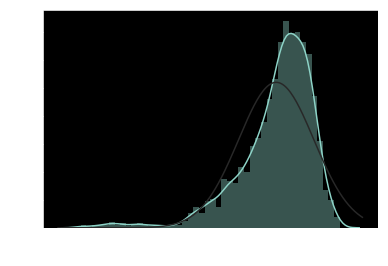

In [75]:
train_labels_log = np.log(train_labels)
sns.distplot(train_labels_log, fit = norm)

# Model

In [76]:
from sklearn.model_selection import train_test_split

train_set = df_features.loc['train']
train_set.drop(['id'], axis = 1, inplace = True)
test_set = df_features.loc['test']


x_train, x_val, y_train, y_val = train_test_split(train_set, train_labels_log, test_size = 0.2, random_state = 1)
print('Train:', x_train.shape, y_train.shape)
print('Val:', x_val.shape, y_val.shape)

Train: (2400, 152) (2400,)
Val: (600, 152) (600,)


In [107]:
import lightgbm as lgb
import gc

train_ds = lgb.Dataset(x_train, label = y_train)
val_ds = lgb.Dataset(x_val, label = y_val)

watchlist = [train_ds, val_ds]

params = {
    'learning_rate': 0.01, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'max_depth': -1,
    'seed': 191, 
    'num_leaves': 31,
    'metric': 'rmse',
    'nthreads': 8,
    'lambda_l1': 0.005,
    'verbose': -1
}

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

gc.collect()

29

In [108]:
lgb_model = lgb.train(params, train_ds, 1000,
                      valid_sets = watchlist, verbose_eval = 20)

[20]	training's rmse: 2.83552	valid_1's rmse: 2.551
[40]	training's rmse: 2.61508	valid_1's rmse: 2.3474
[60]	training's rmse: 2.44378	valid_1's rmse: 2.20761
[80]	training's rmse: 2.3073	valid_1's rmse: 2.10687
[100]	training's rmse: 2.19887	valid_1's rmse: 2.03969
[120]	training's rmse: 2.11187	valid_1's rmse: 2.00235
[140]	training's rmse: 2.04039	valid_1's rmse: 1.97925
[160]	training's rmse: 1.98004	valid_1's rmse: 1.96182
[180]	training's rmse: 1.9279	valid_1's rmse: 1.94748
[200]	training's rmse: 1.88056	valid_1's rmse: 1.93944
[220]	training's rmse: 1.83745	valid_1's rmse: 1.93287
[240]	training's rmse: 1.80145	valid_1's rmse: 1.92706
[260]	training's rmse: 1.76653	valid_1's rmse: 1.92343
[280]	training's rmse: 1.73375	valid_1's rmse: 1.92144
[300]	training's rmse: 1.70124	valid_1's rmse: 1.91755
[320]	training's rmse: 1.67108	valid_1's rmse: 1.92018
[340]	training's rmse: 1.64283	valid_1's rmse: 1.92054
[360]	training's rmse: 1.61635	valid_1's rmse: 1.9204
[380]	training's rms

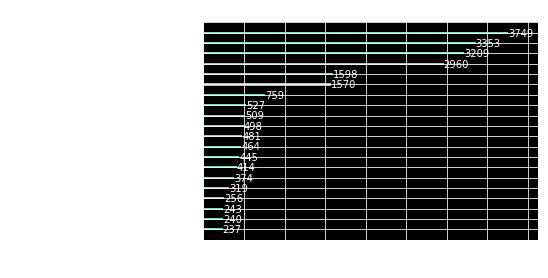

In [115]:
lgb.plot_importance(lgb_model, max_num_features = 20)

In [110]:
val_preds = lgb_model.predict(x_val)
rmsle(val_preds, y_val)

1.9199801919098844

# Test set

In [92]:
test_id = test_set.pop('id')
test_id.head()

Unnamed: 1
0    3001
1    3002
2    3003
3    3004
4    3005
Name: id, dtype: int64

In [93]:
test_set.isna().sum().max()

0

In [111]:
preds = lgb_model.predict(test_set)
preds = np.exp(preds)
print(preds.shape)
preds

(4398,)


array([ 7179469.54536427,   998744.96513443, 35299495.40908442, ...,
       73376637.49706766,  2530690.18112237,   566640.57273691])

In [112]:
submission = pd.DataFrame({'id': test_id, 'revenue': preds})
submission.head()

,id,revenue
Unnamed: 1,,
0,3001,7.179470e+06
1,3002,9.987450e+05
2,3003,3.529950e+07
3,3004,2.282292e+06
4,3005,6.189004e+05


In [113]:
submission.to_csv('submission.csv', index = False)